# <center> What is a Feature ? <br><br> Research Question: Can we find a difference between repository-specific and general feature labels ?</center>

### Glossary

<b>Feature Label</b>: a label that contains the word "feature". <br>
<b>Feature Issue</b>: an issue that has at least one <b>feature label</b>. <br>
<b>Feature Issue Dataset</b>: a dataset containing a number of <b>feature issues</b>. Each feature issue is associated with the repository it comes from through the "repository name" column.

### Importing Required Libraries

In [118]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import numpy as np
import os

### Importing Appropriate DataSet

In [119]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

#pd.reset_option('max_columns')
pd.reset_option('max_colwidth')
pd.reset_option('max_rows')

def combine_partial_datasets(folder_path):
    # Get a list of all files in the specified folder
    file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    dfs = []
    for file in file_list:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        dfs.append(df)
    combined_df = pd.concat(dfs, ignore_index=True)

    return combined_df

df_issues = combine_partial_datasets('../../dataset/issues/partial_datasets/')

df_issues['issueLabels'] = df_issues['issueLabels'].fillna('[]')

# Converting string to actual python lists
df_issues['issueLabels'] = df_issues['issueLabels'].apply(ast.literal_eval)

# Adding a column for each issue containing only its 'feature labels'
df_issues.loc[:, 'featureLabels'] = df_issues['issueLabels'].apply(lambda labels: [label for label in labels if "feature" in label.lower()])

df_issues_exploded = df_issues.explode('featureLabels')

print('Issue Dataframe Shape:', df_issues.shape)
print('Exploded Issue Dataframe Shape:', df_issues_exploded.shape)

df_issues_exploded.head(2)

Issue Dataframe Shape: (265089, 15)
Exploded Issue Dataframe Shape: (283709, 15)


,repositoryName,issueTitle,issueBody,issueNumber,issueState,issueCreatedAt,issueUpdatedAt,issueClosedAt,issueUser,assignee,issueLabels,milestone,comments,commentsURL,featureLabels
0,aws/aws-tools-for-powershell,Disable TLS Certificate Check,### Describe the feature\n\nIssue previously r...,334,open,2023-11-27 07:25:10+00:00,2023-12-08 18:20:22+00:00,NaN,BoneyAz,Not assigned,"[feature-request, module/powershell-cmdlets, q...",No milestone,2,https://api.github.com/repos/aws/aws-tools-for...,feature-request
1,aws/aws-tools-for-powershell,Add support for IAM Identity Center (SSO) auth...,### Describe the feature\r\n\r\nImplement nati...,332,open,2023-08-18 18:04:46+00:00,2023-08-25 16:33:08+00:00,NaN,dbaileyut,Not assigned,"[feature-request, module/powershell-cmdlets, p...",No milestone,2,https://api.github.com/repos/aws/aws-tools-for...,feature-request


### Distribution of Feature Labels with Regards to Repositories

In [120]:
number_of_unique_repos = df_issues_exploded.repositoryName.unique().size
number_of_unique_feature_labels = df_issues_exploded.featureLabels.unique().size
feature_counts = df_issues_exploded.groupby('featureLabels')['repositoryName'].nunique()

print(f"There are {number_of_unique_repos} unique repositories in our dataset and {number_of_unique_feature_labels} unique 'feature labels'. The latter follow the distribution below: \n")
print(feature_counts)

There are 3643 unique repositories in our dataset and 1014 unique 'feature labels'. The latter follow the distribution below: 

featureLabels
#Feature               1
2-Feature              1
:Feature/Datastream    1
:sparkles:Feature      1
:star: top feature     1
                      ..
what/feature           2
wip-feature            1
✨ feature-request      1
🌟 feature              1
🧄 feature/agent-ui     1
Name: repositoryName, Length: 1013, dtype: int64


### Analysis of General vs. Repository-Specific Feature Labels

In [121]:
def show_general_feature_label_distribution(general_feature_labels):
    plt.figure(figsize=(10, 6))
    general_feature_labels.sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title('Number of Repositories for Each Feature Label')
    plt.xlabel('Feature Labels')
    plt.ylabel('Number of Repositories')
    plt.xticks(rotation=45)
    
    plt.show()

### Results

We define a general feature label as a feature label that appears in at least 1.0% of repositories. Based on our dataset, the general feature labels are distributed as follows: 

featureLabels
Feature             239
feature            1896
feature-request     452
feature_request      93
kind/feature        350
new-feature          47
type/feature         49
type:feature         76
Name: repositoryName, dtype: int64 



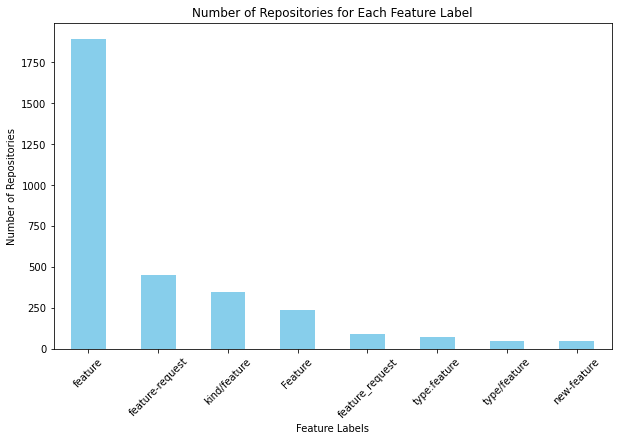

On the other hand, here are some of the repository-specific feature labels (i.e. those that appear in less than 1.0% of repositories) that can be found in our dataset: 

featureLabels
#Feature                  1
2-Feature                 1
:Feature/Datastream       1
:sparkles:Feature         1
:star: top feature        1
>feature                  2
A-crate-features          1
A-feature                 1
A-features                1
A:Feature                 1
AG feature parity         1
APPS/Features             1
AppGw Feature Request     1
B-feature-request         1
B-missing feature         1
C-feature                14
C-feature-accepted        2
C-feature-compat          1
C-feature-request        13
C1-feature                1
Name: repositoryName, dtype: int64



PS: 1.0% of repositories = 36 repositories


In [122]:
threshold_for_general_feature_labels = 0.01
general_feature_labels = feature_counts[feature_counts >= (number_of_unique_repos*threshold_for_general_feature_labels)]
repository_specific_feature_labels = feature_counts[feature_counts < (number_of_unique_repos*threshold_for_general_feature_labels)]

print(f"We define a general feature label as a feature label that appears in at least {threshold_for_general_feature_labels*100}% of repositories. Based on our dataset, the general feature labels are distributed as follows: \n")
print(general_feature_labels, '\n')
show_general_feature_label_distribution(general_feature_labels)

print(f"On the other hand, here are some of the repository-specific feature labels (i.e. those that appear in less than {threshold_for_general_feature_labels*100}% of repositories) that can be found in our dataset: \n")
print(repository_specific_feature_labels.head(20))

print(f"\n\n\nPS: {threshold_for_general_feature_labels*100}% of repositories = {round(number_of_unique_repos*threshold_for_general_feature_labels)} repositories")
